In [42]:
!pip install keras
!pip install tensorflow-gpu==2.2

In [1]:
!sudo -H apt update -y
!sudo -H apt install libgl1-mesa-glx -y

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists... Done3m
Building dependency tree       
Reading state information... Done
1 package can be upgraded. Run 'apt list --upgradable' to see it.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (20.0.8-0ubuntu1~20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
# Importing the Keras libraries and packages
import keras
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import AveragePooling2D, Input
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Cropping2D

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.preprocessing import image

from IPython.display import Image, display
import datetime

from keras.utils import multi_gpu_model

from keras.preprocessing.image import ImageDataGenerator

from os import listdir
import os, random, shutil
from os.path import isfile, join
from IPython.display import Image, display , clear_output
import time

import pandas as pd


In [6]:
batch_size=32


train_datagen = ImageDataGenerator(
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   vertical_flip = True,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(                                 )

training_set = train_datagen.flow_from_directory('data/Florida/day1_full/train/',
                                                 target_size = (400, 225),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')


test_set = test_datagen.flow_from_directory('data/Florida/test_3096/',
                                            target_size = (400, 225),
                                            batch_size = batch_size,
                                            class_mode = 'binary')
test_set2 = test_datagen.flow_from_directory('data/Florida/test_3096/',
                                            target_size = (400, 225),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

# generator= train_datagen.flow_from_directory("train", batch_size=batch_size)
# label_map = (generator.class_indices)

img_height = 225
img_width = 400
dir1= 'data/Florida/day1_full/train/'
# dir2= 'data/Florida/test_1/'
dir2= 'data/Florida/test_3096/'


input_imgen = ImageDataGenerator(#rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   rotation_range=5.,
                                   horizontal_flip = True)

test_imgen = ImageDataGenerator(#rescale = 1./255
                               )


def generate_generator_multiple(generator,dir1, dir2, batch_size, img_height,img_width):
    genX1 = generator.flow_from_directory(dir1,
                                          target_size = (img_height,img_width),
                                          class_mode = 'binary',
                                          batch_size = batch_size
                                         )
    
    genX2 = generator.flow_from_directory(dir2,
                                          target_size = (img_height,img_width),
                                          class_mode = 'binary',
                                          batch_size = batch_size
                                         )
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            yield [X1i[0], X2i[0]], X2i[1]  #Yield both images and their mutual label
            
            
inputgenerator=generate_generator_multiple(generator=input_imgen,
                                           dir1=dir1,
                                           dir2=dir1,
                                           batch_size=batch_size,
                                           img_height=img_height,
                                           img_width=img_width)       
     
testgenerator=generate_generator_multiple(test_imgen,
                                          dir1=dir2,
                                          dir2=dir2,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)  

     
testgenerator1=generate_generator_multiple(test_imgen,
                                          dir1=dir2,
                                          dir2=dir2,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)    

steps_per_epoch =round(len(training_set))
validation_steps =round(len(test_set))
print(steps_per_epoch)
print(validation_steps)

Found 32410 images belonging to 2 classes.
Found 3097 images belonging to 2 classes.
Found 3097 images belonging to 2 classes.
1013
97


In [7]:
from pathlib import Path

test_samples = []
test_labels = []

list1 = (os.listdir("data/Florida/test_3096/change/")) 
list2 = (os.listdir("data/Florida/test_3096/same/")) 

print(len(list1))
print(len(list2))

list5 = (os.listdir("data/Florida/test_3096/change/")) 
list6 = (os.listdir("data/Florida/all_frames/")) 

j=0
while j<3096:

    testnewset1 = (os.listdir("data/Florida/all_frames/")) 
    testnewset_sorted1 = sorted(testnewset1) 
    res1 = testnewset_sorted1[j] 
    res1 =Path(f'data/Florida/all_frames/{res1}').stem
#     print ("The frame number is : " +  str(res1)) 
    
    test_img_path2= f'data/Florida/test_3096/change/{res1}.jpg'
    
    test_samples.append(res1)

#     print(test_img_path2)
    if ( not os.path.isfile(test_img_path2)):
        label =[1]
        test_labels.append(label)
#         print("change")
    else:
#         print("same")
        label =[0]
        test_labels.append(label)

    j+=1


# print(test_labels)
list = pd.DataFrame(np.column_stack([test_samples, test_labels]), 
                               columns=['frame', 'prediction'])
# print(list)

338
2759


In [8]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

from os import listdir
import os, random, shutil
from os.path import isfile, join
from IPython.display import Image, display , clear_output
import time
from pathlib import Path

import numpy as np
from random import shuffle

global k

def file1():
        j =0
        while j <1:
            testnewset1 = (os.listdir("data/Florida/all_frames/")) 
            testnewset_sorted1 = sorted(testnewset1) 
            res1 = testnewset_sorted1[k] 
            print ("The frame number is : " +  str(res1)) 
            test_img_path1 = f"data/Florida/all_frames/{res1}"
            imageA=test_img_path1
            j+=1
        return imageA

def file2():
        j =0
        while j <1:
            testnewset1 = (os.listdir("data/Florida/all_frames/")) 
            testnewset_sorted1 = sorted(testnewset1) 
            res1 = testnewset_sorted1[k] 
            res2 =Path(f'data/Florida/all_frames/{res1}').stem
            res2 = '%010d' % (int(res2)+1 )
            print ("The frame number is : " +  str(res2)+".jpg") 
            test_img_path2 = f"data/Florida/all_frames/{res2}.jpg"
            imageB=test_img_path2
            j+=1

        return imageB
    
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

def compare_images(imageA, imageB):

#     m = mse(file())
        m = mse(imageA, imageB)
#         s = ssim(imageA, imageB)
        return m

test_pred_labels_with_threshold=[]

k=0
while k<3096:

    original1 = cv2.imread(file1())
    original2 = cv2.imread(file2())
    # convert the images to grayscale
    original1 = cv2.cvtColor(original1, cv2.COLOR_BGR2GRAY)
    original2 = cv2.cvtColor(original2, cv2.COLOR_BGR2GRAY)

    result = compare_images(original1,original2)
    print(result)
   
    if result < 720:
        #change
        prediction = [0]
    else:
        #same
        prediction = [1]
        
    print('prediction')
    print(prediction)
    test_pred_labels_with_threshold.append(prediction)
    clear_output(wait=True)

    k+=1
    
test_pred_labels_with_threshold = (np.array(test_pred_labels_with_threshold))


The frame number is : 0000003096.jpg
The frame number is : 0000003097.jpg
225.37685277777777
prediction
[0]


In [9]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true=test_labels, y_score=test_pred_labels_with_threshold)
print(auc)

0.39336113910450066


Confusion matrix, without normalization
[[ 173  164]
 [2090  669]]


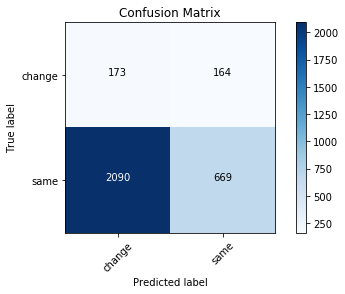

In [11]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_labels, y_pred=test_pred_labels_with_threshold)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_plot_labels = ['change','same']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [18]:
#calculate Euclidean distance of two image in hsv color space in matlab
img1 = cv2.imread("data/Florida/all_frames/0000000006.jpg")
img2 = cv2.imread("data/Florida/all_frames/0000000007.jpg")

def calculateDistance(i1, i2):
    return np.sum((i1-i2)**2)

a= calculateDistance(img1,img2)
print(a)

49346064


In [10]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

from os import listdir
import os, random, shutil
from os.path import isfile, join
from IPython.display import Image, display , clear_output
import time
from pathlib import Path

import numpy as np
from random import shuffle

global k

def file1():
        j =0
        while j <1:
            testnewset1 = (os.listdir("data/Florida/all_frames/")) 
            testnewset_sorted1 = sorted(testnewset1) 
            res1 = testnewset_sorted1[k] 
            print ("The frame number is : " +  str(res1)) 
            test_img_path1 = f"data/Florida/all_frames/{res1}"
            imageA=test_img_path1
            j+=1
        return imageA

def file2():
        j =0
        while j <1:
            testnewset1 = (os.listdir("data/Florida/all_frames/")) 
            testnewset_sorted1 = sorted(testnewset1) 
            res1 = testnewset_sorted1[k] 
            res2 =Path(f'data/Florida/all_frames/{res1}').stem
            res2 = '%010d' % (int(res2)+4 )
            print ("The frame number is : " +  str(res2)+".jpg") 
            test_img_path2 = f"data/Florida/all_frames/{res2}.jpg"
            imageB=test_img_path2
            j+=1

        return imageB

def calculateDistance(i1, i2):
    return np.sum((i1-i2)**2)

test_pred_labels_with_threshold=[]

k=0
while k<3096:

    original1 = cv2.imread(file1())
    original2 = cv2.imread(file2())
    # convert the images to grayscale
#     original1 = cv2.cvtColor(original1, cv2.COLOR_BGR2GRAY)
#     original2 = cv2.cvtColor(original2, cv2.COLOR_BGR2GRAY)

    a= calculateDistance(original1,original2)

    result = compare_images(original1,original2)
    print(result)
   
    if result > 1800:
        #change
        prediction = [0]
    else:
        #same
        prediction = [1]
        
    print('prediction')
    print(prediction)
    test_pred_labels_with_threshold.append(prediction)
    clear_output(wait=True)

    k+=1
    
test_pred_labels_with_threshold = (np.array(test_pred_labels_with_threshold))


The frame number is : 0000003096.jpg
The frame number is : 0000003100.jpg
2174.9414555555554
prediction
[0]


In [12]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true=test_labels, y_score=test_pred_labels_with_threshold)
print(auc)

0.6287827374774546


Confusion matrix, without normalization
[[ 228  109]
 [1156 1603]]


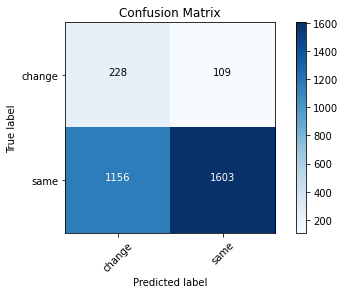

In [13]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_labels, y_pred=test_pred_labels_with_threshold)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_plot_labels = ['change','same']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')